<a href="https://colab.research.google.com/github/Jucicarla/analise-de-sentimento/blob/main/analise_sentimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análise de Sentimentos usando TextBlob: Analisar comentários postados por usuários sobre restaurantes.**





#Instalação de pacotes

In [4]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


#Importar pacotes

In [31]:
from time import sleep
from textblob import TextBlob
from textblob.exceptions import NotTranslated 
import nltk
import pandas as pd
import json
import re
import random
# montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
arquivo = '/content/drive/MyDrive/dataset-v2.dat'
d = []
with open(arquivo) as infile:
  for line in infile:
    try:
      item = json.loads(line.strip())
      d.append(item)
    except:
      None

In [8]:
#criou um DataFrame a partir de um dataset
df = pd.DataFrame(d)

In [4]:
df

,title,reviewId,restaurantId,author,reviewBody,language,mobileDevice,userLocation,publicationDate,visitDate,ratingValue,itemReviewed
0,Jantar,692856288,2344932,larinhavercosa222,"Comida maravilhosa, lugar do verdadeiro chicle...",pt,True,"São Carlos, SP",26/07/2019,07/2019,5,"{'name': 'Imperador dos Camarões', 'address': ..."
1,Uma boa experiência.,229208487,3720906,Pano P,"Comida boa, drinks legais e um ambiente bem ac...",pt,True,"Manaus, AM",16/09/2014,None,4,"{'name': 'Guacamole Natal', 'address': {'stree..."
2,Otimo self service,679002332,2248105,Magma100,"Excelente pra ir com a família! Ótima Comida, ...",pt,True,"Goiânia, GO",04/06/2019,07/2018,4,"{'name': 'Chica Pitanga', 'address': {'streetA..."
3,O sorvete mais tradicional do estado,355671519,8168302,Yurie M,Tomo sorvete na Visabor faz mais de 30 anos. S...,pt,False,"Aracaju, SE",15/03/2016,01/2016,5,"{'name': 'Sorvetes Vi Sabor', 'address': {'str..."
4,Melhor hamburger!,268741921,5395141,Debora_C85,O melhor hamburger que já comi! Excelente aten...,pt,False,"Rio de Janeiro, RJ",28/04/2015,04/2015,5,"{'name': 'Z Deli Sandwich Shop', 'address': {'..."
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Nova opção no Paseo!!!,672210394,17424548,Fabiano B,"Ainda não inaugurado oficialmente, está atende...",pt,True,"Porto Alegre, RS",07/05/2019,05/2019,5,"{'name': 'Boteco Maestro', 'address': {'street..."
99996,Bom,380904400,2440184,Chris L,"Bom atendimento, lugar bonito, comida muito go...",pt,True,"Cork, Irlanda",08/06/2016,01/2016,4,"{'name': 'Casa do Marquês', 'address': {'stree..."
99997,Bom bar,186111858,2392996,Guilherme P,O Rio Scenarium é uma das baladas mais famosas...,pt,False,"São Paulo, SP",27/11/2013,11/2013,4,"{'name': 'Rio Scenarium', 'address': {'streetA..."
99998,Me senti enganada...,152745909,1062290,LisianeCohem,"Fui por indicação e com boa expectativa!\n116,...",pt,True,"Porto Alegre, RS",21/02/2013,None,2,"{'name': 'Celeiro', 'address': {'streetAddress..."


In [9]:
df.drop_duplicates(['reviewBody'], inplace=True)

In [10]:
df.reviewBody


0        Comida maravilhosa, lugar do verdadeiro chicle...
1        Comida boa, drinks legais e um ambiente bem ac...
2        Excelente pra ir com a família! Ótima Comida, ...
3        Tomo sorvete na Visabor faz mais de 30 anos. S...
4        O melhor hamburger que já comi! Excelente aten...
                               ...                        
99995    Ainda não inaugurado oficialmente, está atende...
99996    Bom atendimento, lugar bonito, comida muito go...
99997    O Rio Scenarium é uma das baladas mais famosas...
99998    Fui por indicação e com boa expectativa!\n116,...
99999    Experiência fantástica com comida deliciosa e ...
Name: reviewBody, Length: 99997, dtype: object

In [23]:
comentarios = df.reviewBody

In [24]:
comentarios

0        Comida maravilhosa, lugar do verdadeiro chicle...
1        Comida boa, drinks legais e um ambiente bem ac...
2        Excelente pra ir com a família! Ótima Comida, ...
3        Tomo sorvete na Visabor faz mais de 30 anos. S...
4        O melhor hamburger que já comi! Excelente aten...
                               ...                        
99995    Ainda não inaugurado oficialmente, está atende...
99996    Bom atendimento, lugar bonito, comida muito go...
99997    O Rio Scenarium é uma das baladas mais famosas...
99998    Fui por indicação e com boa expectativa!\n116,...
99999    Experiência fantástica com comida deliciosa e ...
Name: reviewBody, Length: 99996, dtype: object

#**Pré-Processamento: Limpeza e organização**

In [14]:
#remover linhas Duplicadas
comentarios = df.drop_duplicates(['reviewBody'], inplace=True)

In [ ]:
#retorna o numero de linhas que ficaram
# df.reviewBody.count()

In [15]:
# remove links, pontos, virgulas,ponto e virgulas do texto
def Limpeza_dados(instancia):
  #re = expressao regular
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    return (instancia)

**Limpeza dos dados nulos**

In [48]:
#metodo que identifica e soma os valores nulos em todo o dataset
df.isnull().sum()

title              0
reviewId           0
restaurantId       0
author             0
reviewBody         0
language           0
mobileDevice       0
userLocation       0
publicationDate    0
visitDate          0
ratingValue        0
itemReviewed       0
reviewBody_us      0
dtype: int64

como os dados da coluna 'ReviewID' estão os comentários, essa coluna é importante para análise.

In [47]:
#limpando dados nulos da coluna que contém os comentarios
df = df.dropna(subset=['reviewBody'])

In [25]:
comentarios.to_csv('comentarios.csv')

In [27]:
df_comentario = pd.read_csv('/content/comentarios.csv', sep = ',')

In [28]:
df_comentario

,Unnamed: 0,reviewBody
0,0,"Comida maravilhosa, lugar do verdadeiro chicle..."
1,1,"Comida boa, drinks legais e um ambiente bem ac..."
2,2,"Excelente pra ir com a família! Ótima Comida, ..."
3,3,Tomo sorvete na Visabor faz mais de 30 anos. S...
4,4,O melhor hamburger que já comi! Excelente aten...
...,...,...
99991,99995,"Ainda não inaugurado oficialmente, está atende..."
99992,99996,"Bom atendimento, lugar bonito, comida muito go..."
99993,99997,O Rio Scenarium é uma das baladas mais famosas...
99994,99998,"Fui por indicação e com boa expectativa!\n116,..."


In [75]:
df_comentario.values

array([[0,
        'Comida maravilhosa, lugar do verdadeiro chiclete de camarão. \nO garçom Éric Lima nos atendeu muito bem, pretendemos voltar assim que possível.'],
       [1,
        'Comida boa, drinks legais e um ambiente bem aconchegante. \nProvamos muitas coisas e tudo nos agradou. Principalmente um pato servido em um dos pratos da casa, sensacional!'],
       [2,
        'Excelente pra ir com a família! Ótima Comida, ambiente agradável, bom atendimento e estacionamento. Vale a pena conhecer'],
       ...,
       [99997,
        'O Rio Scenarium é uma das baladas mais famosas do Rio de Janeiro. É bem grande e lotada de estrangeiros. A bebida não é tão cara como em outras cidades, por exemplo, São Paulo. O lado negativo é com certeza a fila. Se você não chegar cedo, vai ficar pelo menos 30 minutos esperando para entrar.'],
       [99998,
        'Fui por indicação e com boa expectativa!\n116,00 o kilo de salada... Bem caro, né?\nO alface tava murcho, nada de opções de tempero, bu

In [33]:
df['reviewBody_us'] = 'NaN'

In [45]:
for i,x in enumerate(range(200)):
  idRandom = random.randint(0,200)
  if df.reviewBody_us[idRandom] == 'NaN':
    comentario_blob = TextBlob(df.reviewBody[idRandom])
    comentario_blob_us = comentario_blob.translate(to='us')
    comentario_blob_us = str(comentario_blob_us)
    df.loc[idRandom,'reviewBody_us'] = comentario_blob_us



In [43]:
#mostrar todos os comentarios
for x in (range(len(df))):
  if df.reviewBody_us[x] != 'NaN':
    print(x, (df['reviewBody_us'][x]))

1 Good food, nice drinks and a very cozy atmosphere.
We tried many things and everything pleased us. Especially a duck served in one of the house dishes, sensational!
2 Excellent to go with the family! Great food, pleasant atmosphere, good service and parking. worth knowing
3 I have had ice cream at Visabor for over 30 years. Fruit or artificial flavors. Crunchy cone and simple atmosphere. Very good prices. I recommend
4 The best hamburger I've ever eaten! Excellent service, the food was great. The restaurant is quite small, but nice and fun.
5 The restaurant is new, super cozy and charming with great service. The portions are generous, very tasty and at a fair price. Good selection of wines. I highly recommend the seafood spaghetti, bolognese, carbonara and risotto. The tiramisu is also fantastic.
Every time I went with my boyfriend, but it is an excellent environment to take family or friends.
7 Great food with good attendance and with a lot of good things to take your wife and girlf

KeyError: ignored

In [41]:
comentario_blob_us

'Beautiful and super cozy place! Excellent music. Great service, super attentive waiters! Antipasti table with lots of options! Price justifies the quality!'

In [38]:
df_comentario

,Unnamed: 0,reviewBody
0,0,"Comida maravilhosa, lugar do verdadeiro chicle..."
1,1,"Comida boa, drinks legais e um ambiente bem ac..."
2,2,"Excelente pra ir com a família! Ótima Comida, ..."
3,3,Tomo sorvete na Visabor faz mais de 30 anos. S...
4,4,O melhor hamburger que já comi! Excelente aten...
...,...,...
99991,99995,"Ainda não inaugurado oficialmente, está atende..."
99992,99996,"Bom atendimento, lugar bonito, comida muito go..."
99993,99997,O Rio Scenarium é uma das baladas mais famosas...
99994,99998,"Fui por indicação e com boa expectativa!\n116,..."


#**1 - Visão Geral dos DADOS**



##**Histograma**
## Qual a distribuição das estrelas dos participantes da pesquisa?
## A maioria dos participantes deram conceitos na  faixa entre 3 a 5 estrelas, sendo 5 a mais frequente.

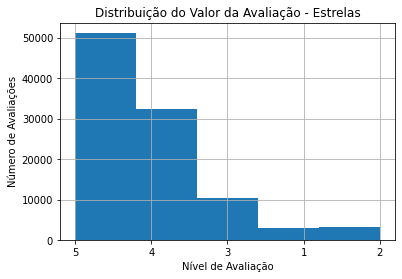

In [ ]:
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
df.ratingValue.hist(bins = 5)
plt.xlabel("Nível de Avaliação")
plt.ylabel("Número de Avaliações")
plt.title("Distribuição do Valor da Avaliação - Estrelas")
plt.show()

##**Informações Sobre de onde saiu os comentários:**


In [ ]:
lista_demographics = df.loc[:, ["language", "userLocation", "mobileDevice"]]
lista_demographics.head(10)

,language,userLocation,mobileDevice
0,pt,"São Carlos, SP",True
1,pt,"Manaus, AM",True
2,pt,"Goiânia, GO",True
3,pt,"Aracaju, SE",False
4,pt,"Rio de Janeiro, RJ",False
5,pt,None,False
6,pt,"Brasília, DF",True
7,pt,"Vila Velha, ES",False
8,pt,"Teresina, PI",True
9,pt,"Belo Horizonte, MG",False


In [ ]:
#lista de todas as colunas
df.columns

Index(['title', 'reviewId', 'restaurantId', 'author', 'reviewBody', 'language',
       'mobileDevice', 'userLocation', 'publicationDate', 'visitDate',
       'ratingValue', 'itemReviewed'],
      dtype='object')

In [ ]:
df['userLocation'].value_counts()

Manaus,AM    100000
Name: userLocation, dtype: int64

In [ ]:
df.userLocation.describe()

count        100000
unique            1
top       Manaus,AM
freq         100000
Name: userLocation, dtype: object

In [ ]:
df.iloc[0]

title                                                        Jantar 
reviewId                                                   692856288
restaurantId                                                 2344932
author                                             larinhavercosa222
reviewBody         Comida maravilhosa, lugar do verdadeiro chicle...
language                                                          pt
mobileDevice                                                    True
userLocation                                               Manaus,AM
publicationDate                                           26/07/2019
visitDate                                                    07/2019
ratingValue                                                        5
itemReviewed       {'name': 'Imperador dos Camarões', 'address': ...
Name: 0, dtype: object

#Análise de Sentimentos

Exemplo de comentário

In [ ]:
comentario = "Conheço o restaurante em várias cidades do Brasil. O de Manaus não foge muito da qualidade e beleza. Atendimento bom, ambiente bonito. Mas a comida não surpreendeu, aliás até decepcionou. Não foi aquele sabor que estamos acostumados quando vamos a este restaurante. Pode ter sido um fato isolado, mas."

Texto convertido para o formato TextBlob

In [ ]:
comentario_blob = TextBlob(comentario)

Comentário traduzido para Inglês (US)

In [ ]:
comentario_blob_us = comentario_blob.translate(to='us')

In [ ]:
comentario_blob_us

TextBlob("I know the restaurant in several cities in Brazil. The one in Manaus is not far from quality and beauty. Good service, beautiful environment. But the food was not surprising, even disappointed. It was not that flavor we are used to when we go to this restaurant. It may have been an isolated event, but.")

#Cálculo da subjetividade

O valor da subjetividade é um número real entre [0.0, 1.0], onde 0.0 o texto é indicado como muito objetivo e 1.0 o texto é indicado como muito subjetivo.

In [ ]:
for sentence_br, sentence in zip(comentario_blob.sentences, comentario_blob_us.sentences):
    print(sentence_br, ':', sentence.sentiment.subjectivity)

Conheço o restaurante em várias cidades do Brasil. : 0.0
O de Manaus não foge muito da qualidade e beleza. : 1.0
Atendimento bom, ambiente bonito. : 0.8
Mas a comida não surpreendeu, aliás até decepcionou. : 0.625
Não foi aquele sabor que estamos acostumados quando vamos a este restaurante. : 0.0
Pode ter sido um fato isolado, mas. : 0.0


#Cálculo da polaridade

O valor da polaridade é um número real entre os valores [-1.0, 1.0].

In [ ]:
for sentence_br, sentence in zip(comentario_blob.sentences, comentario_blob_us.sentences):
    print(sentence_br, ':', sentence.sentiment.polarity)

Conheço o restaurante em várias cidades do Brasil. : 0.0
O de Manaus não foge muito da qualidade e beleza. : -0.05
Atendimento bom, ambiente bonito. : 0.7749999999999999
Mas a comida não surpreendeu, aliás até decepcionou. : -0.55
Não foi aquele sabor que estamos acostumados quando vamos a este restaurante. : 0.0
Pode ter sido um fato isolado, mas. : 0.0


#**Visão Temporal**

#**Visão Geográfica**